In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler as ss
from sklearn.metrics import accuracy_score, confusion_matrix

def vif(a: pd.DataFrame, b: np.array):
    a["VIF"] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
    a["Features"] = b.columns
    print(a)

def scaler(a: pd.DataFrame):
    scaler = ss()
    scaler.fit(a)
    return scaler.transform(a)

def metrics(clf, X_train, X_test, y_train, y_test, train = True):
    if train == True:
        print("Train Result:\n")
        pred = clf.predict(X_train)
        print(f"Accuracy score = {accuracy_score(y_train, pred) * 100:.2f} %\n")
        print(f"Confusion matrix =\n {confusion_matrix(y_train, pred)}")
        print("\n==========================\n")
    
    elif train == False:
        print("Test Result:\n")
        pred = clf.predict(X_test)
        print(f"Accuracy score = {accuracy_score(y_test, pred) * 100:.2f} %\n")
        print(f"Confusion matrix =\n {confusion_matrix(y_test, pred)}")

In [2]:
data_wtarget = pd.read_csv("heart.csv")
data = data_wtarget
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
y = data_wtarget['target']

In [4]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
values = data.columns.values
categ_val = []
attr_val = []
for value in values:
    if len(data[value].unique()) <= 5:
        categ_val.append(value)
    else:
        attr_val.append(value)

In [6]:
categ = data.drop(columns = attr_val)
categ

,sex,cp,fbs,restecg,exang,slope,ca,thal,target
0,1,3,1,0,0,0,0,1,1
1,1,2,0,1,0,0,0,2,1
2,0,1,0,0,0,2,0,2,1
3,1,1,0,1,0,2,0,2,1
4,0,0,0,1,1,2,0,2,1
...,...,...,...,...,...,...,...,...,...
298,0,0,0,1,1,1,0,3,0
299,1,3,0,1,0,1,0,3,0
300,1,0,1,1,0,1,2,3,0
301,1,0,0,1,1,1,1,3,0


In [7]:
attr = data.drop(columns = categ_val)
attr

,age,trestbps,chol,thalach,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6
...,...,...,...,...,...
298,57,140,241,123,0.2
299,45,110,264,132,1.2
300,68,144,193,141,3.4
301,57,130,131,115,1.2


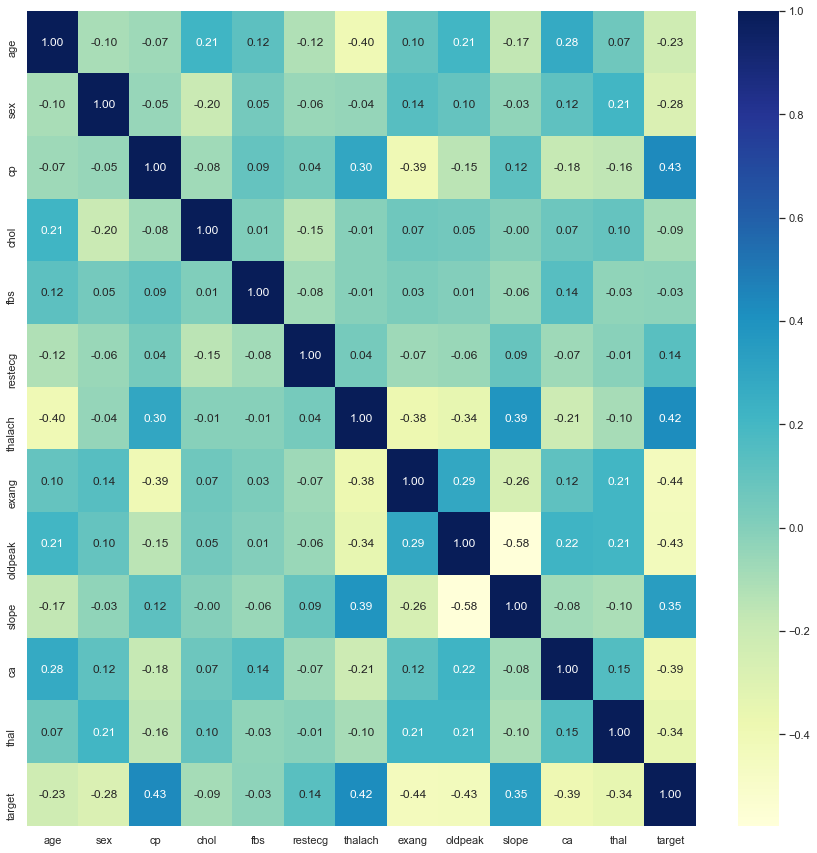

In [8]:
corr_mat = data.drop(['trestbps'], axis = 1).corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_mat, annot=True, fmt=".2f", cmap="YlGnBu");

In [9]:
target_corr = corr_mat['target'][:-1]
target_corr.sort_values()

exang     -0.436757
oldpeak   -0.430696
ca        -0.391724
thal      -0.344029
sex       -0.280937
age       -0.225439
chol      -0.085239
fbs       -0.028046
restecg    0.137230
slope      0.345877
thalach    0.421741
cp         0.433798
Name: target, dtype: float64

In [10]:
vif_data = pd.DataFrame()
vif(vif_data, attr.drop(['trestbps','chol'], axis = 1))

         VIF Features
0  17.603015      age
1  15.245170  thalach
2   1.963245  oldpeak


In [11]:
data = data.drop(['target'], axis = 1)
attr = attr.drop(['chol'
                  ,'trestbps'
                 ], axis = 1)
categ = categ.drop(['fbs','target'], axis = 1)

In [12]:
categ_val.remove('fbs')
categ_val.remove('target')

In [13]:
attr_val.remove('trestbps')
attr_val.remove('chol')

In [14]:
attr

,age,thalach,oldpeak
0,63,150,2.3
1,37,187,3.5
2,41,172,1.4
3,56,178,0.8
4,57,163,0.6
...,...,...,...
298,57,123,0.2
299,45,132,1.2
300,68,141,3.4
301,57,115,1.2


In [15]:
X_sc = scaler(attr)
X_sc = pd.DataFrame(X_sc, columns = attr_val)
categ_dummy = pd.get_dummies(categ, columns = categ_val)

In [16]:
data = pd.concat([X_sc, categ_dummy], axis = 1)

In [17]:
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test = tts(data, y, test_size = 0.25, random_state = 100)

In [18]:
from sklearn.linear_model import LogisticRegression 

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

metrics(log_reg, X_train, X_test, y_train, y_test, train = True)
metrics(log_reg, X_train, X_test, y_train, y_test, train = False)

Train Result:

Accuracy score = 86.78 %

Confusion matrix =
 [[ 80  18]
 [ 12 117]]


Test Result:

Accuracy score = 88.16 %

Confusion matrix =
 [[32  8]
 [ 1 35]]


In [19]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

metrics(knn, X_train, X_test, y_train, y_test, train = True)
metrics(knn, X_train, X_test, y_train, y_test, train = False)

Train Result:

Accuracy score = 87.22 %

Confusion matrix =
 [[ 81  17]
 [ 12 117]]


Test Result:

Accuracy score = 86.84 %

Confusion matrix =
 [[31  9]
 [ 1 35]]


In [20]:
from sklearn.svm import SVC


svm = SVC(kernel='rbf', gamma = 0.1, C = 1.0)
svm.fit(X_train, y_train)

metrics(knn, X_train, X_test, y_train, y_test, train = True)
metrics(knn, X_train, X_test, y_train, y_test, train = False)

Train Result:

Accuracy score = 87.22 %

Confusion matrix =
 [[ 81  17]
 [ 12 117]]


Test Result:

Accuracy score = 86.84 %

Confusion matrix =
 [[31  9]
 [ 1 35]]


In [21]:
from sklearn.tree import DecisionTreeClassifier


tree = DecisionTreeClassifier(random_state = 42)
tree.fit(X_train, y_train)

metrics(tree, X_train, X_test, y_train, y_test, train = True)
metrics(tree, X_train, X_test, y_train, y_test, train = False)

Train Result:

Accuracy score = 100.00 %

Confusion matrix =
 [[ 98   0]
 [  0 129]]


Test Result:

Accuracy score = 81.58 %

Confusion matrix =
 [[33  7]
 [ 7 29]]


In [22]:
from sklearn.ensemble import RandomForestClassifier

rand_forest = RandomForestClassifier(n_estimators=1000, random_state=42)
rand_forest.fit(X_train, y_train)

metrics(rand_forest, X_train, X_test, y_train, y_test, train=True)
metrics(rand_forest, X_train, X_test, y_train, y_test, train=False)

Train Result:

Accuracy score = 100.00 %

Confusion matrix =
 [[ 98   0]
 [  0 129]]


Test Result:

Accuracy score = 86.84 %

Confusion matrix =
 [[32  8]
 [ 2 34]]


In [23]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

metrics(xgb, X_train, X_test, y_train, y_test, train=True)
metrics(xgb, X_train, X_test, y_train, y_test, train=False)

[23:06:45] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train Result:

Accuracy score = 100.00 %

Confusion matrix =
 [[ 98   0]
 [  0 129]]


Test Result:

Accuracy score = 88.16 %

Confusion matrix =
 [[33  7]
 [ 2 34]]


C:\Users\mu_ka\anaconda3\envs\DS\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
